# Exercise 1 Logistic Regression

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [11]:
import pandas as pd

# Provide the correct URL to the CSV file
url = 'https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-2/Unit-2.2/ChurnData.csv'

# Read the CSV file into a DataFrame
churn_df = pd.read_csv(url)

# Print the DataFrame
print(churn_df)

     tenure   age  address  income   ed  employ  equip  callcard  wireless  \
0      11.0  33.0      7.0   136.0  5.0     5.0    0.0       1.0       1.0   
1      33.0  33.0     12.0    33.0  2.0     0.0    0.0       0.0       0.0   
2      23.0  30.0      9.0    30.0  1.0     2.0    0.0       0.0       0.0   
3      38.0  35.0      5.0    76.0  2.0    10.0    1.0       1.0       1.0   
4       7.0  35.0     14.0    80.0  2.0    15.0    0.0       1.0       0.0   
..      ...   ...      ...     ...  ...     ...    ...       ...       ...   
195    55.0  44.0     24.0    83.0  1.0    23.0    0.0       1.0       0.0   
196    34.0  23.0      3.0    24.0  1.0     7.0    0.0       1.0       0.0   
197     6.0  32.0     10.0    47.0  1.0    10.0    0.0       1.0       0.0   
198    24.0  30.0      0.0    25.0  4.0     5.0    0.0       1.0       1.0   
199    61.0  50.0     16.0   190.0  2.0    22.0    1.0       1.0       1.0   

     longmon  ...  pager  internet  callwait  confer  ebill  lo

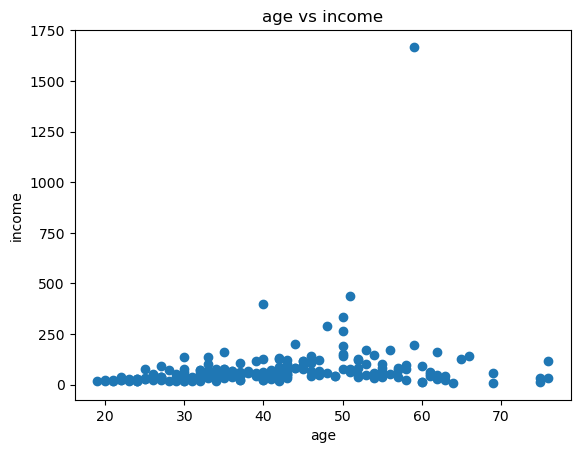

In [15]:
#plotting scatter plot between age vs income
import pandas as pd
import matplotlib.pyplot as plt

# Provide the correct URL to the CSV file
url = 'https://raw.githubusercontent.com/Code-Unnati/Advance-Course/master/Module-1/Unit-2/Unit-2.2/ChurnData.csv'

# Read the CSV file into a DataFrame
churn_df = pd.read_csv(url)

# Create a scatter plot
plt.scatter(churn_df['age'], churn_df['income'])
plt.title('age vs income')
plt.xlabel('age')
plt.ylabel('income')
plt.show()


In [14]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn']=churn_df['churn'].astype('int')
print(churn_df.shape)
churn_df.head()

(200, 10)


,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [19]:
#DataFrame to Numpy
X=churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless']]
#X=X.drop(['tenure'],axis=1)
Y=churn_df[['churn']]
np_X=np.asanyarray(X)
np_Y=np.asanyarray(Y)

In [20]:
#Machine Learning Started .....
from sklearn.preprocessing import StandardScaler ### Preprocess the data
std_scl=StandardScaler()
std_scl.fit(np_X)
np_X_procs=std_scl.transform(np_X)

In [21]:
#Train / Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(np_X_procs, np_Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (160, 9) (160, 1)
Test set: (40, 9) (40, 1)


In [22]:
#Model initialization & training
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]

In [23]:
#Model Predictions
Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)
print(Y_pred)
print('\n')
print((Y_pred_prob))

[0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1.]


[[0.58711718 0.41288282]
 [0.56650898 0.43349102]
 [0.5313329  0.4686671 ]
 [0.66722528 0.33277472]
 [0.53481231 0.46518769]
 [0.59508358 0.40491642]
 [0.49995014 0.50004986]
 [0.56532893 0.43467107]
 [0.39939231 0.60060769]
 [0.59368426 0.40631574]
 [0.54844546 0.45155454]
 [0.58957413 0.41042587]
 [0.52439771 0.47560229]
 [0.41344893 0.58655107]
 [0.68930146 0.31069854]
 [0.51576247 0.48423753]
 [0.4969602  0.5030398 ]
 [0.46038301 0.53961699]
 [0.47010467 0.52989533]
 [0.57170621 0.42829379]
 [0.50781873 0.49218127]
 [0.49802608 0.50197392]
 [0.66938224 0.33061776]
 [0.49625351 0.50374649]
 [0.47635919 0.52364081]
 [0.73040145 0.26959855]
 [0.45111513 0.54888487]
 [0.49187403 0.50812597]
 [0.4927476  0.5072524 ]
 [0.73618723 0.26381277]
 [0.70809718 0.29190282]
 [0.5549927  0.4450073 ]
 [0.40681176 0.59318824]
 [0.73720605 0.26279395]
 [0.6355682  0.3644318 ]


Model achieved a classification accuracy of:	0.65


Model Confusion Matrix


Jaccard Similarity Score:	0.36363636363636365


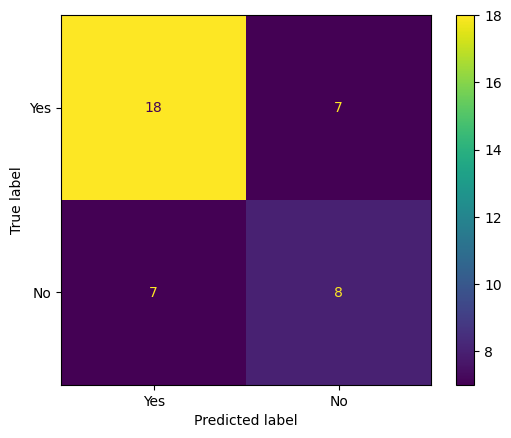

In [24]:
#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))

In [25]:
#Generate classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.72      0.72      0.72        25
         1.0       0.53      0.53      0.53        15

    accuracy                           0.65        40
   macro avg       0.63      0.63      0.63        40
weighted avg       0.65      0.65      0.65        40



In [28]:
import pandas as pd

# Provide the correct URL to the CSV file
url = 'https://raw.githubusercontent.com/mohit-bhatia23/Code_Unnati/main/penguins_binary_classification.csv'

# Read the CSV file into a DataFrame
churn_df = pd.read_csv(url)

# Print the DataFrame
print(churn_df)

# Read the CSV file into a DataFrame
churn_df = pd.read_csv(url)

# Print the DataFrame
print(churn_df)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
269  Gentoo     Biscoe            47.2           13.7              214.0   
270  Gentoo     Biscoe            46.8           14.3              215.0   
271  Gentoo     Biscoe            50.4           15.7              222.0   
272  Gentoo     Biscoe            45.2           14.8              212.0   
273  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g  year  
0         3750.0  2007  
1         3800.0  2007  
2         32